In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Downloading data fom yahoo finance

In [31]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "XRP-USD" 
xrp_data = yf.download(stock, start, end)
xrp_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2024-03-21,0.612168,0.653521,0.599408,0.640691,0.640691,2809003717
2024-03-22,0.640695,0.644345,0.600405,0.610949,0.610949,2053036282
2024-03-23,0.610948,0.632407,0.605780,0.617596,0.617596,1160450696


In [32]:
xrp_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2.329000e+03
mean,0.524190,0.545010,0.501920,0.524376,0.524376,2.360624e+09
std,0.330166,0.357384,0.303498,0.330100,0.330100,3.331033e+09
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08
25%,0.304628,0.312774,0.298095,0.304696,0.304696,8.529580e+08
50%,0.448066,0.461899,0.429939,0.448448,0.448448,1.402992e+09
75%,0.627168,0.644886,0.608560,0.627072,0.627072,2.411430e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10


In [33]:
xrp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2329 entries, 2017-11-09 to 2024-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2329 non-null   float64
 1   High       2329 non-null   float64
 2   Low        2329 non-null   float64
 3   Close      2329 non-null   float64
 4   Adj Close  2329 non-null   float64
 5   Volume     2329 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.4 KB


In [34]:
xrp_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
xrp_data.columns = xrp_data.columns.str.lower()

Closing price data

In [36]:
closing_price = xrp_data[['close']]
closing_price

,close
Date,
2017-11-09,0.217488
2017-11-10,0.206483
2017-11-11,0.210430
2017-11-12,0.197339
2017-11-13,0.203442
...,...
2024-03-21,0.640691
2024-03-22,0.610949
2024-03-23,0.617596


<Axes: xlabel='Date'>

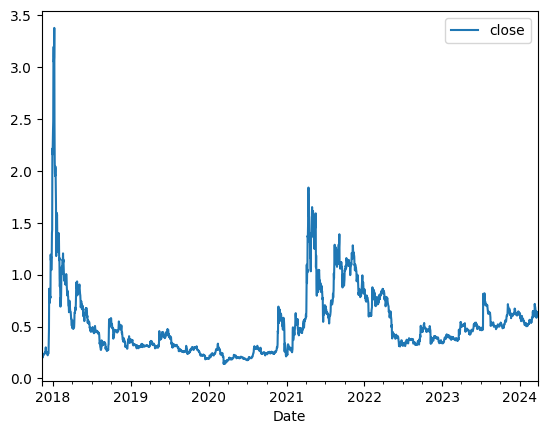

In [37]:
closing_price.plot()

Text(0.5, 1.0, 'closing price of xrp')

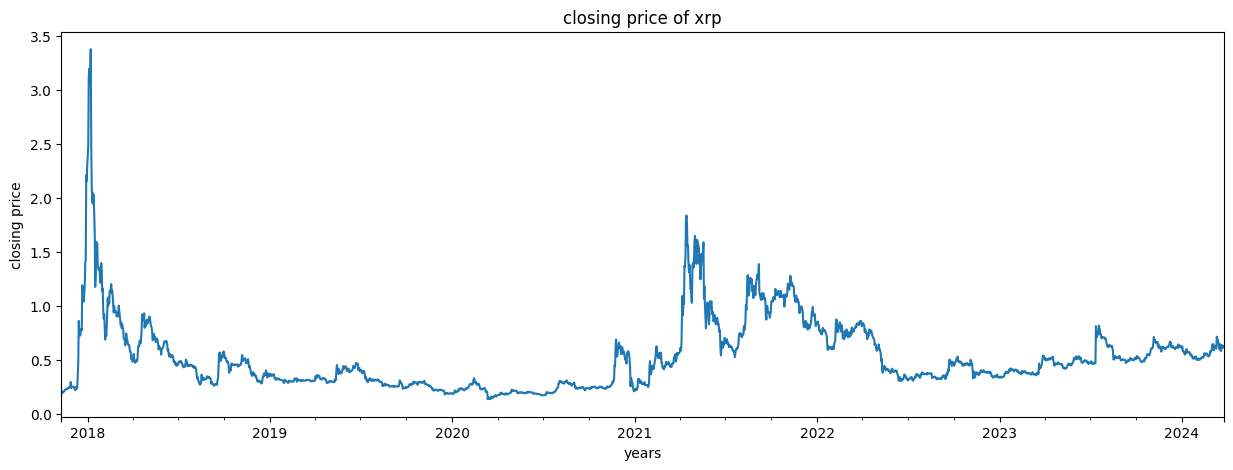

In [38]:
plt.figure(figsize=(15, 5))
closing_price['close'].plot()
plt.xlabel('years')
plt.ylabel('closing price')
plt.title('closing price of xrp')

In [39]:
for i in range(2014,2024):
    print(list(closing_price.index.year).count(i))

0
0
0
53
365
365
366
365
365
365


Monthly average cloding prices for the Ripple cryptocurrency.

In [40]:
closing_price['month_average_365_days'] = closing_price['close'].rolling(window=365).mean()
closing_price['month_average_365_days'].head()

C:\Users\aivi1\AppData\Local\Temp\ipykernel_18072\2660627513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['month_average_365_days'] = closing_price['close'].rolling(window=365).mean()


Date
2017-11-09   NaN
2017-11-10   NaN
2017-11-11   NaN
2017-11-12   NaN
2017-11-13   NaN
Name: month_average_365_days, dtype: float64

Text(0.5, 1.0, 'closing price of xrp')

<Figure size 640x480 with 0 Axes>

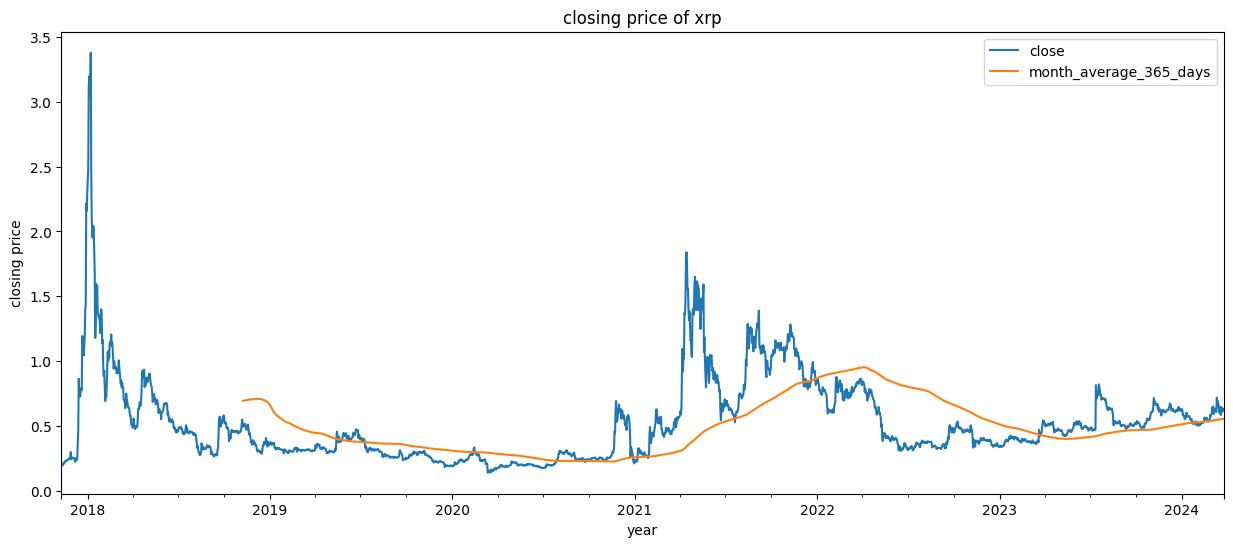

In [42]:
plt.figure()
closing_price[['close', 'month_average_365_days']].plot(figsize=(15, 6))
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('closing price of xrp')

Monthle closing prices for 100 days

C:\Users\aivi1\AppData\Local\Temp\ipykernel_18072\912477157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['month_average_100_days'] = closing_price['close'].rolling(window=100).mean()


Text(0.5, 1.0, 'Closing price of xrp')

<Figure size 640x480 with 0 Axes>

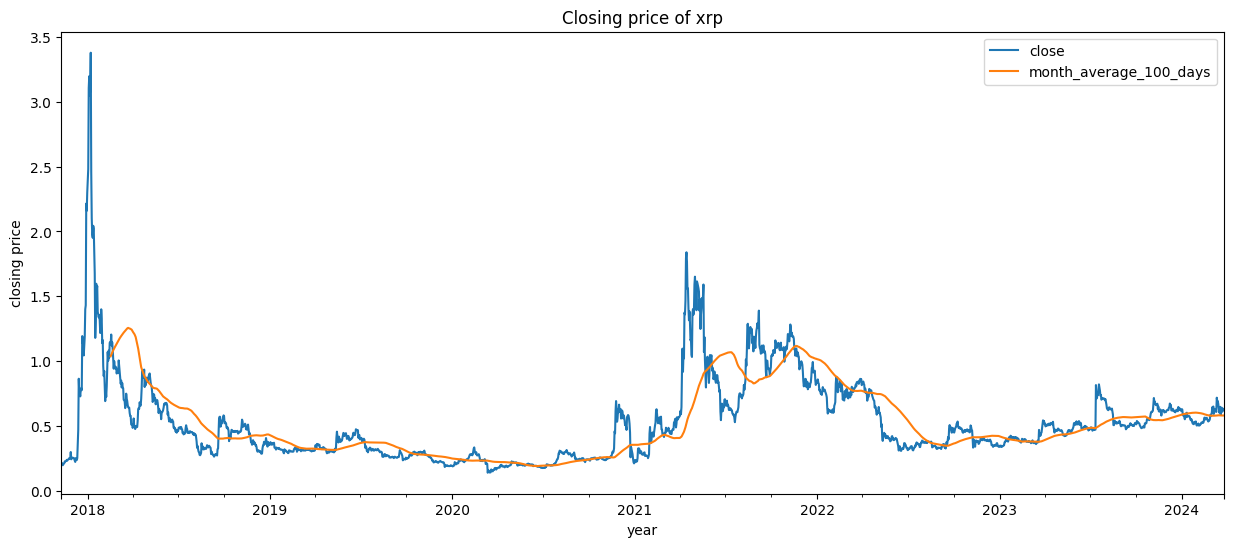

In [43]:
closing_price['month_average_100_days'] = closing_price['close'].rolling(window=100).mean()
closing_price['month_average_100_days'].head()
plt.figure()
closing_price[['close', 'month_average_100_days']].plot(figsize=(15, 6))
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('Closing price of xrp')

ML model

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['close']].values)
scaled_data

array([[0.02404225],
       [0.02064373],
       [0.02186262],
       ...,
       [0.14760196],
       [0.15234353],
       [0.15175401]])

In [45]:
scaled_data.shape

(2329, 1)

In [46]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0], y_data[0]

(array([[0.02404225],
        [0.02064373],
        [0.02186262],
        [0.01781991],
        [0.01970462],
        [0.02167579],
        [0.02264269],
        [0.02701275],
        [0.02685031],
        [0.02748215],
        [0.02821991],
        [0.03061107],
        [0.02891629],
        [0.03064195],
        [0.03173609],
        [0.03242784],
        [0.03482147],
        [0.03371745],
        [0.03529519],
        [0.04926139],
        [0.03194052],
        [0.03435361],
        [0.03584241],
        [0.03577849],
        [0.03487242],
        [0.03518525],
        [0.0328784 ],
        [0.02869178],
        [0.02568978],
        [0.0347387 ],
        [0.03244822],
        [0.0301707 ],
        [0.03460468],
        [0.0722339 ],
        [0.10235024],
        [0.22377666],
        [0.19039922],
        [0.19115922],
        [0.18180951],
        [0.19726296],
        [0.20123126],
        [0.19650853],
        [0.32531443],
        [0.30839749],
        [0.31953338],
        [0

In [47]:
len_train = int(len(x_data) * 0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2006, 100, 1)
(2006, 1)
(223, 100, 1)
(223, 1)
